<a href="https://colab.research.google.com/github/ShawnGrub/Desktop_Gremlin/blob/master/imageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1) Create a random image of daisy flower with python code and export as jpg**

Daisy flower image saved as daisy_flower.jpg


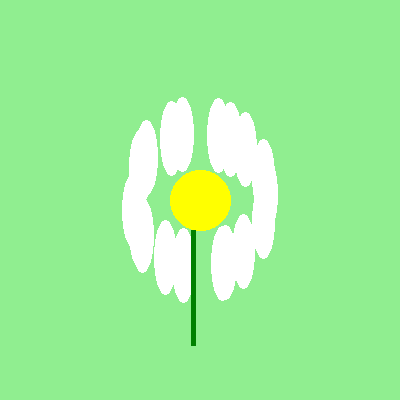

In [10]:
from PIL import Image, ImageDraw
import random
from math import cos, sin, radians
from IPython.display import display

def create_daisy_image(width=400, height=400):
    # Create a light green background for grass
    img = Image.new('RGB', (width, height), color = (144, 238, 144))
    d = ImageDraw.Draw(img)

    center_x, center_y = width // 2, height // 2

    # Daisy center (yellow circle)
    center_radius = random.randint(30, 40)
    d.ellipse([(center_x - center_radius, center_y - center_radius),
               (center_x + center_radius, center_y + center_radius)],
              fill=(255, 255, 0)) # Yellow

    # Petals (white ellipses)
    num_petals = random.randint(15, 25)
    petal_length = random.randint(60, 90)
    petal_width = random.randint(15, 25)

    for i in range(num_petals):
        angle = (360 / num_petals) * i
        # Add some randomness to the angle
        angle += random.uniform(-10, 10)
        rad_angle = radians(angle)

        # Petal's inner point (where it connects to the center)
        px_inner = int(center_x + (center_radius * cos(rad_angle)))
        py_inner = int(center_y + (center_radius * sin(rad_angle)))

        # Petal's outer point
        px_outer = int(center_x + ((center_radius + petal_length) * cos(rad_angle)))
        py_outer = int(center_y + ((center_radius + petal_length) * sin(rad_angle)))

        # Define the bounding box for the petal ellipse, centered around the midpoint of inner and outer points
        mid_px = (px_inner + px_outer) // 2
        mid_py = (py_inner + py_outer) // 2

        # Draw the petal ellipse. For better rotation, one would typically use affine transforms,
        # but for simplicity, we'll draw an ellipse that roughly aligns.
        d.ellipse([
            (mid_px - petal_width // 2, mid_py - petal_length // 2),
            (mid_px + petal_width // 2, mid_py + petal_length // 2)
        ],
        fill=(255, 255, 255)) # White

    # Optionally add a stem
    stem_width = random.randint(5, 10)
    stem_length = random.randint(80, 120)
    stem_x = center_x + random.randint(-10, 10)
    stem_y_start = center_y + center_radius
    stem_y_end = stem_y_start + stem_length
    d.line([(stem_x, stem_y_start), (stem_x, stem_y_end)], fill=(0, 128, 0), width=stem_width) # Green stem

    return img

# Create the daisy image
daisy_img = create_daisy_image()

# Save the image as JPG
file_name = 'daisy_flower.jpg'
daisy_img.save(file_name)

print(f"Daisy flower image saved as {file_name}")

# Display the image
display(daisy_img)

**2) Create a random image of rose flower with python code and export as jpg**

Rose flower image saved as rose_flower.jpg


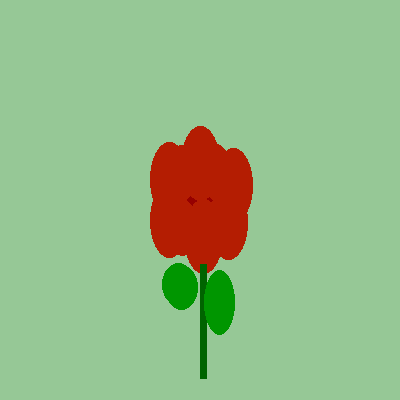

In [11]:
from PIL import Image, ImageDraw
import random
from math import sin, cos, radians, pi
from IPython.display import display

def create_rose_image(width=400, height=400):
    img = Image.new('RGB', (width, height), color=(150, 200, 150)) # Greenish background
    d = ImageDraw.Draw(img)

    center_x, center_y = width // 2, height // 2

    # Randomize rose colors
    # Shades of red, pink, or yellow
    hue = random.choice(['red', 'pink', 'yellow'])
    if hue == 'red':
        petal_base_color = (random.randint(180, 255), random.randint(0, 50), random.randint(0, 50))
    elif hue == 'pink':
        petal_base_color = (random.randint(200, 255), random.randint(100, 180), random.randint(100, 180))
    else: # yellow
        petal_base_color = (random.randint(200, 255), random.randint(200, 255), random.randint(0, 50))

    # Draw a central bud/core
    core_radius = random.randint(15, 25)
    d.ellipse([(center_x - core_radius, center_y - core_radius),
               (center_x + core_radius, center_y + core_radius)],
              fill=(petal_base_color[0] - 30, petal_base_color[1] - 30, petal_base_color[2] - 30) if petal_base_color[0] > 30 else petal_base_color)

    # Draw overlapping petals
    num_petal_layers = random.randint(4, 7)
    petal_length_max = random.randint(60, 90)
    petal_width_max = random.randint(30, 45)

    for layer in range(num_petal_layers):
        num_petals_in_layer = random.randint(5, 8)
        petal_length = petal_length_max * (layer + 1) / num_petal_layers
        petal_width = petal_width_max * (layer + 1) / num_petal_layers

        for i in range(num_petals_in_layer):
            angle = (360 / num_petals_in_layer) * i + (layer * 30) # Spiral effect
            angle += random.uniform(-10, 10) # Add some randomness
            rad_angle = radians(angle)

            # Petal attachment point offset from center
            attach_radius = core_radius + (petal_length * 0.2 * layer / num_petal_layers)

            px = int(center_x + attach_radius * cos(rad_angle))
            py = int(center_y + attach_radius * sin(rad_angle))

            # Define petal shape (simplified as an ellipse)
            # Adjust size and position based on layer
            petal_size_factor = 0.5 + 0.5 * layer / num_petal_layers
            current_petal_width = int(petal_width * petal_size_factor)
            current_petal_length = int(petal_length * petal_size_factor)

            # To simulate rotation, we can orient the ellipse bounding box
            # This is a simplified approach without true rotation transforms
            x1 = px - current_petal_width // 2
            y1 = py - current_petal_length // 2
            x2 = px + current_petal_width // 2
            y2 = py + current_petal_length // 2

            d.ellipse([(x1, y1), (x2, y2)], fill=petal_base_color)

    # Stem
    stem_width = random.randint(5, 10)
    stem_length = random.randint(100, 150)
    stem_x = center_x + random.randint(-15, 15)
    stem_y_start = center_y + core_radius + random.randint(30, 50)
    stem_y_end = stem_y_start + stem_length
    d.line([(stem_x, stem_y_start), (stem_x, stem_y_end)], fill=(0, 100, 0), width=stem_width) # Dark green stem

    # Leaves (optional)
    num_leaves = random.randint(1, 3)
    for _ in range(num_leaves):
        leaf_x = stem_x + random.randint(-30, 30)
        leaf_y = random.randint(stem_y_start + 20, stem_y_end - 20)
        leaf_width = random.randint(20, 40)
        leaf_height = random.randint(40, 70)
        d.ellipse([
            (leaf_x - leaf_width // 2, leaf_y - leaf_height // 2),
            (leaf_x + leaf_width // 2, leaf_y + leaf_height // 2)
        ],
        fill=(0, 150, 0)) # Green leaf

    return img

# Create the rose image
rose_img = create_rose_image()

# Save the image as JPG
file_name = 'rose_flower.jpg'
rose_img.save(file_name)

print(f"Rose flower image saved as {file_name}")

# Display the image
display(rose_img)

**2) Horizontal flip the rose flower image**

Successfully loaded rose_flower.jpg
Flipped rose flower image saved as rose_flower_flipped.jpg


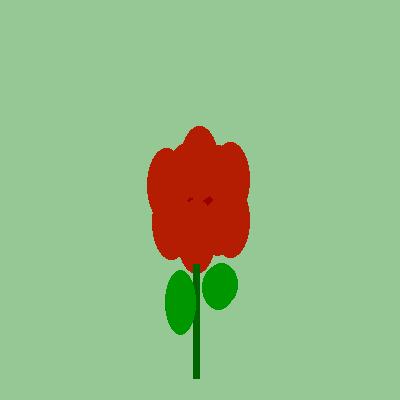

In [12]:
from PIL import Image
from IPython.display import display

# Load the rose flower image
file_name = 'rose_flower.jpg'
try:
    rose_img = Image.open(file_name)
    print(f"Successfully loaded {file_name}")
except FileNotFoundError:
    print(f"Error: {file_name} not found. Please ensure the image was generated previously.")
    rose_img = None

if rose_img:
    # Horizontal flip
    flipped_rose_img = rose_img.transpose(Image.FLIP_LEFT_RIGHT)

    # Save the flipped image
    flipped_file_name = 'rose_flower_flipped.jpg'
    flipped_rose_img.save(flipped_file_name)

    print(f"Flipped rose flower image saved as {flipped_file_name}")

    # Display the flipped image
    display(flipped_rose_img)

**3) Scale the rose flower image to format 4:5 suitable for instagram post**

**4) Remove the background of the rose flower and export as PNG**